In [10]:
from ipywidgets import interact
from fastai.basics import *

def plot_function(f, title=None, min=-2.1, max=2.1, color="r", ylim=None):
    x = torch.linspace(min, max, 100)[:, None]
    if ylim:  plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title: plt.title(title)

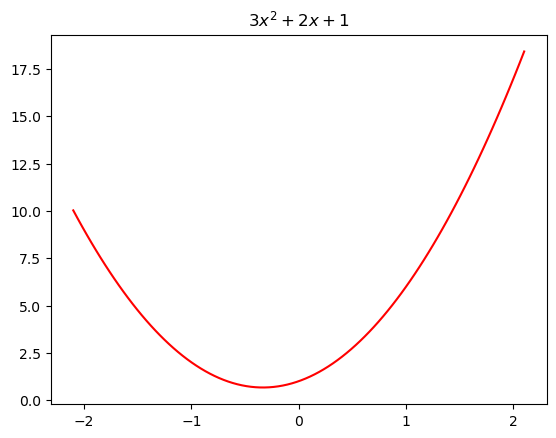

In [12]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [13]:
def quad(a, b, c, x): return a*x**2 + b*x +c
def mk_quad(a, b, c): return partial(quad, a, b, c)

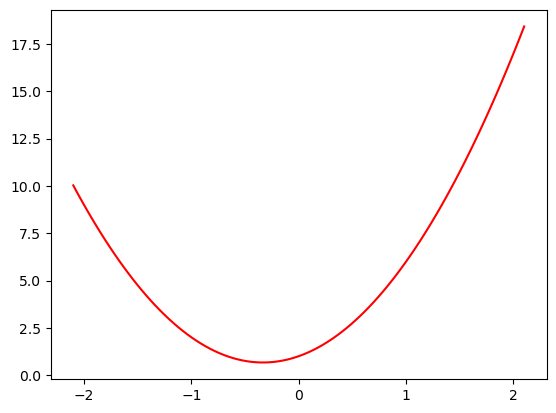

In [17]:
f2 = mk_quad(3, 2, 1)
plot_function(f2)

In [26]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x, mult)) + noise(x, add)

In [27]:
np.random.seed(42)
x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x), 0.15, 1.5)

In [28]:
x[:5], y[:5]

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]),
 tensor([[11.8690],
         [ 6.5433],
         [ 5.9396],
         [ 2.6304],
         [ 1.7947]], dtype=torch.float64))

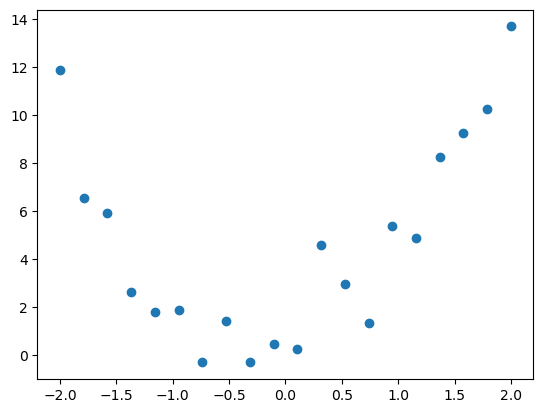

In [29]:
plt.scatter(x, y)

In [30]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x, y)
    plot_function(mk_quad(a,b,c), ylim=(-3, 13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [31]:
def mean_abs_err(preds, acts): return torch.abs(preds - acts).mean()

In [34]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a, b, c)
    plt.scatter(x, y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3, 12), title=f"MAE: {loss.item():.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [35]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y)

In [36]:
quad_mae([1.1, 1.1, 1.1])

TensorBase(2.4219)

In [37]:
abc = torch.tensor([1.1, 1.1, 1.1], requires_grad=True)
loss = quad_mae(abc)
loss

TensorBase(2.4219, grad_fn=<AliasBackward0>)

In [38]:
loss.backward()

In [40]:
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

In [41]:
with torch.no_grad():
    abc -= 0.01*abc.grad
    loss = quad_mae(abc)
loss

TensorBase(2.4010)

In [42]:
for i in range(10):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= 0.01*abc.grad
    print(i, loss)

0 TensorBase(2.4010, grad_fn=<AliasBackward0>)
1 TensorBase(2.3594, grad_fn=<AliasBackward0>)
2 TensorBase(2.2970, grad_fn=<AliasBackward0>)
3 TensorBase(2.2137, grad_fn=<AliasBackward0>)
4 TensorBase(2.1097, grad_fn=<AliasBackward0>)
5 TensorBase(1.9848, grad_fn=<AliasBackward0>)
6 TensorBase(1.8535, grad_fn=<AliasBackward0>)
7 TensorBase(1.7166, grad_fn=<AliasBackward0>)
8 TensorBase(1.5825, grad_fn=<AliasBackward0>)
9 TensorBase(1.4628, grad_fn=<AliasBackward0>)


In [43]:
abc

tensor([1.9634, 1.1381, 1.4100], requires_grad=True)

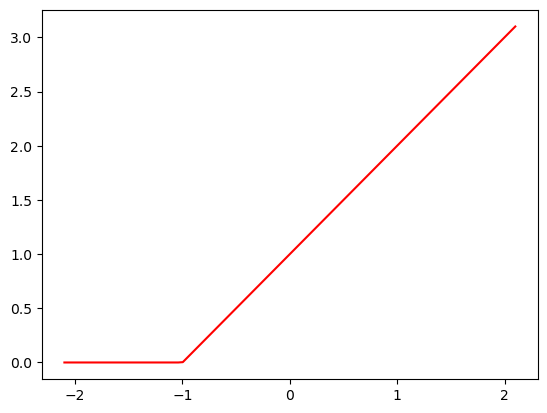

In [47]:
def rectified_linear_unit(m, b, x):
    y = m*x + b
    return torch.clip(y, 0)

plot_function(partial(rectified_linear_unit, 1, 1))

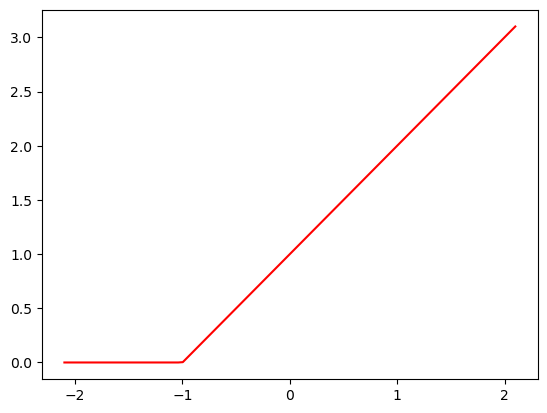

In [48]:
import torch.nn.functional as F
def relu(m, b, x): return F.relu(m*x + b)
plot_function(partial(relu, 1, 1))

In [49]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(relu, m, b), ylim=(-1, 4))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [51]:
def double_relu(m1, b1, m2, b2, x):
    return relu(m1, b1, x) + relu(m2, b2, x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1, b1, m2, b2), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

In [54]:
def triple_relu(m1, b1, m2, b2, m3, b3, x):
    return relu(m1, b1, x) + relu(m2, b2, x) + relu(m3, b3, x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5, m3=1.0, b3=1.0)
def plot_triple_relu(m1, b1, m2, b2, m3, b3):
    plt.scatter(x, y)
    f = partial(triple_relu, m1, b1, m2, b2, m3, b3)
    loss = mae(f(x), y)
    plot_function(f, title=loss.item())

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

0 TensorBase(2.7224, grad_fn=<AliasBackward0>)
100 TensorBase(1.8033, grad_fn=<AliasBackward0>)
200 TensorBase(1.9979, grad_fn=<AliasBackward0>)
300 TensorBase(1.6558, grad_fn=<AliasBackward0>)
400 TensorBase(1.6733, grad_fn=<AliasBackward0>)
500 TensorBase(1.8834, grad_fn=<AliasBackward0>)
600 TensorBase(1.1347, grad_fn=<AliasBackward0>)
700 TensorBase(1.7659, grad_fn=<AliasBackward0>)


tensor([-12.7721, -14.0227,   8.9719,  -6.0736,   2.3161, -14.8647],
       requires_grad=True)

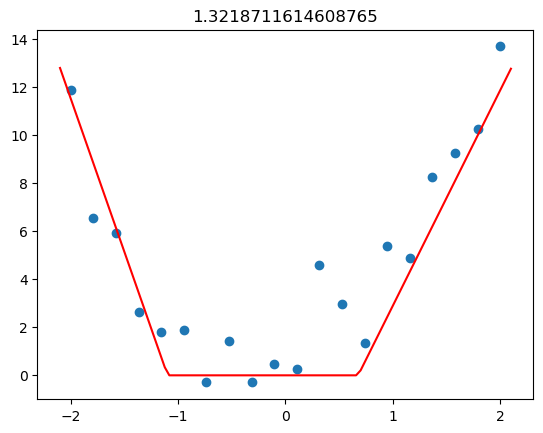

In [87]:
params = torch.tensor([-1.5, -1.5, 1.5, 1.5, 1.0, 1.0], requires_grad=True)
for i in range(800):
    f = partial(triple_relu, *params)
    loss = mae(f(x), y)
    loss.backward()
    with torch.no_grad(): params -= 0.001*params.grad
    if i % 100 == 0: print(i, loss)

plt.scatter(x, y)
plot_function(partial(triple_relu, *params.detach()), title=loss.item())
params